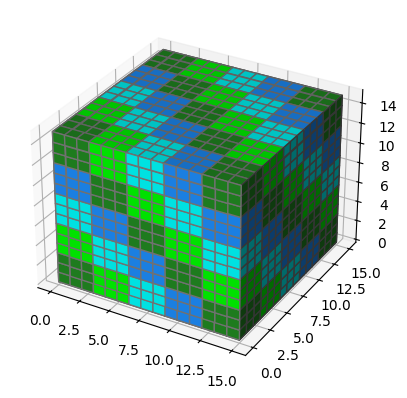

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import cycle, product, permutations
from random import shuffle
from tqdm import tqdm

class Triplet:
    def __init__(self, i, j, k):
        self.i = i
        self.j = j
        self.k = k

class Info:
    def __init__(self, proc_rank, beg, end):
        self.proc_rank = proc_rank
        self.beg = beg
        self.end = end
        self.len = Triplet(end.i - beg.i + 1,
                           end.j - beg.j + 1,
                           end.k - beg.k + 1)


N = 15
num_threads = 4
m = 3 # Сторона малого куба
# Нужно вычислять m(N, num_threads)!!!
# Но как?!
M = (N + m - 1) // m # Число малых кубов на одной оси

alpha = 1  # control transparency


# Create axis
axes = [N, N, N]

# Create data
data = np.ones(axes)

# Control colour
# colors = np.empty(axes + [4])
# colors[:] = [1, 1, 1, alpha] # red
# # Create color pallete
# pallete = [[int(j) for j in i] + [alpha] for i in product("01", repeat=3)]
# pallete.pop()

# Control colour
colors = np.empty(axes, dtype=object)
colors[:] = "red"
pallete = ["forestgreen", "lime", "aqua", "dodgerblue"]
pallete = [i[1] for i in zip(range(num_threads), cycle(pallete))]

# Init metadata

metadata = []
for i in range(0, M*M*M):
    proc_rank = i % num_threads
    beg = Triplet(i // (M*M) * m,
                  i % (M*M) // M * m,
                  i % M * m)
    end = Triplet(min(beg.i + m - 1, N - 1),
                  min(beg.j + m - 1, N - 1),
                  min(beg.k + m - 1, N - 1))
    info = Info(proc_rank, beg, end)
    metadata.append(info)




# prepare some coordinates
x, y, z = np.indices((N, N, N))

# # draw cuboids in the top left and bottom right corners, and a link between
# # them
for info in metadata:
    cube_mask = ((info.beg.i <= x) & (x <= info.end.i)) & ((info.beg.j <= y) & (y <= info.end.j)) & ((info.beg.k <= z) & (z <= info.end.k))
    # print(((info.beg.i <= x) & (x <= info.end.i)).any())
    colors[cube_mask] = pallete[info.proc_rank]
    
# cube1 = (x < 3) & (y < 3) & (z < 3)
# cube2 = (x >= 5) & (y >= 5) & (z >= 5)
# link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# # combine the objects into a single boolean array
# voxelarray = cube1 | cube2 | link

# # set the colors of each object
# colors = np.empty(voxelarray.shape, dtype=object)
# colors[link] = 'red'
# colors[cube1] = 'blue'
# colors[cube2] = 'green'




# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors, edgecolors='grey')
plt.savefig("out.png", dpi=300)


In [ ]:
# cube_mask = (info.beg.i < x & x < info.end.i) & (info.beg.j < y & y < info.end.j) & (info.beg.k < z & z < info.end.k)

Create c:


8it [00:00, 71851.03it/s]


Triple gen


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 36631.48it/s]


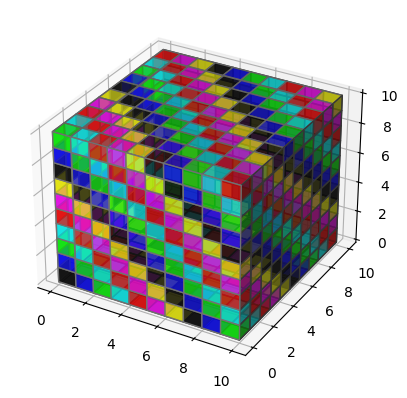

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import cycle, product, permutations
from tqdm import tqdm

n = 10
# Create axis
axes = [n, n, n]

# Create Data
data = np.ones(axes)

# control Transparency
alpha = 0.7

# control colour
colors = np.empty(axes + [4])

colors[:] = [1, 1, 1, alpha] # red


print("Create c:")
c = list()
for i in tqdm(product("01", repeat=3)):
    c.append([int(j) for j in i])
c.pop()
c = cycle(c)


def triple_gen(N):
    sqrt_from_2_approx = 1.4
    #len of cube diagonal == sqrt(2)*N
    #we take resized cube, and fill lower
    #triangle for our resized cube =>
    #our one-sized cube will be filled fully
    #for k in range(0, int(2*sqrt_from_2_approx*N)):
    resized_length = 3 * N - 2
    print("Triple gen")
    for k in tqdm(range(0, resized_length)):
        col = next(c)
        for ki in range(k + 1):
            for a in range(ki + 1):
                if a < N and (ki-a) < N and (k - ki) < N:
                    #do stuff
                    colors[a, ki-a, k - ki] = col + [alpha]


triple_gen(n)

# Plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Voxels is used to customizations of the
# sizes, positions and colors.
ax.voxels(data, facecolors=colors, edgecolors='grey')
plt.savefig("out.png", dpi=300)
